## Misc Testing - SKIP

In [ ]:
#############################################################################################################
## notes on the coco train and val IMAGES 2017 dataset - links here - https://cocodataset.org/#download
## train 2017 has 118287 images, 18GB - http://images.cocodataset.org/zips/train2017.zip
## val   2017 has 5000   images, 1GB  - http://images.cocodataset.org/zips/val2017.zip
## test  2017 has 40670  images, 6GB  - http://images.cocodataset.org/zips/test2017.zip

## notes on the coco train+val 2017 annotations
## combined file of 241MB - http://images.cocodataset.org/annotations/annotations_trainval2017.zip
## is a huge json - see the data exploration notes below
#############################################################################################################

In [ ]:
# mount gdrive and verify the folder contents

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
! ls ./gdrive

'My Drive'


In [ ]:
! ls './gdrive/My Drive/ThesisStoryGen/Data/'

audio					    coco_train2017_wget_1
coco_annotations_trainval2017		    coco_val2017_wget_1
coco_test_2017_40k_images_op4neo_1_1_5k     DatasetsNotes-20200517.xlsx
coco_test_2017_40k_images_op4neo_1_15k_20k  flickr30k_images.tar.gz
coco_test_2017_40k_images_op4neo_1_5k_10k   ImgCapTraining
coco_test2017_wget_1			    saved_keras_model


In [ ]:
! ls './gdrive/My Drive/ThesisStoryGen/Data/coco_val2017_wget_1/'

val2017  val2017.zip


In [ ]:
! ls './gdrive/My Drive/ThesisStoryGen/Data/coco_val2017_wget_1/val2017/' | wc -l

5000


In [ ]:
################################################
## data exploration on the annotations dataset
################################################

## about val2017 ::::
## max caption length = 247 for val2017    'A large square concrete wall, which shows peo...'
## 25014 caption entries for the 5000 images

## about train2017 ::::
## 591753 caption entries for the 118287 images
## max caption length = 250 for train2017  - multiple entries
##      'Front view of person holding animal spotted pr...'
##      'The image shows an entertainment cubby in the ...'
##      'The vee shaped part of a white-walled room sho...'
##      'The scene shows outdoors, furthest to closest,...'
##      'Black and white of two women sitting on a marb...'
##      'From furthest to nearest, the view shows, clou...'
##      'From below view of the head, neck, and paws of...'
##      'A room with long table with widescreen televis...'
##      'Two men holding tennis rackets up in a hand on...'
##      'Restaurant table top with logo in middle and a...'
##      'A near-ground shot shows logo-covered wall and...'
##      'An apartment with an open floor plan,  that al...'
##      'A black and white shot shows a  bus interior w...'
##      'An image from a copyrighted foodie site shows ...'

In [ ]:
import os
import json
import pandas as pd

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
OPDIR = '/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'
IPDIRIMGS = '/content/gdrive/My Drive/ThesisStoryGen/Data/coco_val2017_wget_1/val2017/'
IPDIRANNO = '/content/gdrive/My Drive/ThesisStoryGen/Data/coco_annotations_trainval2017/'

In [ ]:
os.listdir('/content/gdrive/My Drive/ThesisStoryGen/Data/coco_annotations_trainval2017/')

['captions_val2017.json', 'captions_train2017.json', 'sample_data_in_file.txt']

In [ ]:
with open(IPDIRANNO+'captions_train2017.json', 'r') as f:
  data = json.load(f)
  #data.keys() # dict_keys(['info', 'licenses', 'images', 'annotations'])
  #type(data['annotations']) # is a list
  #type(data['images'])      # also is a list

In [ ]:
dfanno = pd.DataFrame(data=data['annotations'])
# dfanno.columns = Index(['image_id', 'id', 'caption'], dtype='object') 
# dfanno.dtypes =
#   image_id     int64
#   id           int64
#   caption     object
#   dtype: object

dfimages = pd.DataFrame(data=data['images'])
# dfimages.columns = Index(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'], dtype='object')
# dfimages.dtypes =
#   license           int64
#   file_name        object
#   coco_url         object
#   height            int64
#   width             int64
#   date_captured    object
#   flickr_url       object
#   id                int64
#   dtype: object
## of above, am dropping useless columns
dfimages.drop(['license', 'coco_url', 'date_captured', 'flickr_url'], axis = 1, inplace=True)

## columns remaining in the dfs are:
# dfanno columns are      image_id , id , caption
#                         179765   , 38 ,	A black Honda motorcycle parked in front of a ...
# dfimages columns are    file_name        , height ,  width , id
#                         000000397133.jpg , 427    ,  640   , 397133

## the captions are not ordered for each image and seem to randomly placed

In [ ]:
dfanno['caplen'] = dfanno.caption.str.len()
dfanno.caplen.max()

250

In [ ]:
longest_caption_len = dfanno.caption[dfanno.caplen == dfanno.caplen.max()].to_string(index=False)
print(f"{type(longest_caption_len)}")
print(f"{longest_caption_len}")

<class 'str'>
 Front view of person holding animal spotted pr...
 The image shows an entertainment cubby in the ...
 The vee shaped part of a white-walled room sho...
 The scene shows outdoors, furthest to closest,...
 Black and white of two women sitting on a marb...
 From furthest to nearest, the view shows, clou...
 From below view of the head, neck, and paws of...
 A room with long table with widescreen televis...
 Two men holding tennis rackets up in a hand on...
 Restaurant table top with logo in middle and a...
 A near-ground shot shows logo-covered wall and...
 An apartment with an open floor plan,  that al...
 A black and white shot shows a  bus interior w...
 An image from a copyrighted foodie site shows ...


In [ ]:
dfanno.head(2)

,image_id,id,caption,caplen
0,203564,37,A bicycle replica with a clock as the front wh...,50
1,322141,49,A room with blue walls and a white sink and door.,49


In [ ]:
dfanno = dfanno.merge(dfimages, left_on='image_id', right_on='id', how='inner')
dfanno.drop(['id_y'], axis=1, inplace=True)
dfanno.rename(columns={'id_x':'id'}, inplace=True)
dfanno.columns

Index(['image_id', 'id', 'caption', 'caplen', 'file_name', 'height', 'width'], dtype='object')

In [ ]:
dfanno.head(5)

,image_id,id,caption,caplen,file_name,height,width
0,203564,37,A bicycle replica with a clock as the front wh...,50,000000203564.jpg,400,400
1,203564,181,The bike has a clock as a tire.,31,000000203564.jpg,400,400
2,203564,478,A black metal bicycle with a clock inside the ...,58,000000203564.jpg,400,400
3,203564,6637,A bicycle figurine in which the front wheel is...,69,000000203564.jpg,400,400
4,203564,6802,A clock with the appearance of the wheel of a ...,54,000000203564.jpg,400,400


In [ ]:
len(dfanno)

591753

In [ ]:
dfanno['file_name'].nunique()

118287

# Training a NEW model - using COCO val2017 full data

In [ ]:
###############################################################################
## Training a NEW model based on this code:
##
## Image Captionining with AI
## Link 1: https://blog.paperspace.com/image-captioning-with-ai/
## This code used Flickr8k dataset.
##
## Understanding RNNs with an example of assigning an emoji to a sentence
## Link 2: https://iq.opengenus.org/recurrent-neural-networks-with-emoji-sentence-example/
## This code used Flickr8k dataset.
##
## Using full 5k images data of COCO-VAL2017
###############################################################################

In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import pickle
#import itertools
from sklearn.model_selection import train_test_split
import PIL
import PIL.Image

In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
OPDIR = '/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'
IPDIRIMGS = '/content/gdrive/My Drive/ThesisStoryGen/Data/coco_val2017_wget_1/val2017/'
IPDIRANNO = '/content/gdrive/My Drive/ThesisStoryGen/Data/coco_annotations_trainval2017/'
WORD_EMBEDDINGS_DIR = '/content/gdrive/My Drive/ThesisStoryGen/Data/WordEmbeddings/'

## ONLY ONCE: Start with the COCO_2017 Annodations json file. Preprocess the captions and make entries in the hashmap datastructure of {'image_filename_without_extension': ['caption_1', 'etc']}. Finally pickle hashmap for reloading

### Load Captions

In [ ]:
os.listdir('/content/gdrive/My Drive/ThesisStoryGen/Data/coco_annotations_trainval2017/')

['captions_val2017.json', 'captions_train2017.json', 'sample_data_in_file.txt']

In [ ]:
## from the annotations file, load the captions

with open(IPDIRANNO+'captions_val2017.json', 'r') as f:
  data = json.load(f)
  #data.keys() # dict_keys(['info', 'licenses', 'images', 'annotations'])
  #type(data['annotations']) # is a list
  #type(data['images'])      # also is a list

dfanno = pd.DataFrame(data=data['annotations'])
# dfanno.columns = Index(['image_id', 'id', 'caption'], dtype='object') 
# dfanno.dtypes =
#   image_id     int64
#   id           int64
#   caption     object
#   dtype: object

dfimages = pd.DataFrame(data=data['images'])
# dfimages.columns = Index(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'], dtype='object')
# dfimages.dtypes =
#   license           int64
#   file_name        object
#   coco_url         object
#   height            int64
#   width             int64
#   date_captured    object
#   flickr_url       object
#   id                int64
#   dtype: object
## of above, am dropping useless columns
dfimages.drop(['license', 'coco_url', 'date_captured', 'flickr_url'], axis = 1, inplace=True)

## columns remaining in the dfs are:
# dfanno columns are      image_id , id , caption
#                         179765   , 38 ,	A black Honda motorcycle parked in front of a ...
# dfimages columns are    file_name        , height ,  width , id
#                         000000397133.jpg , 427    ,  640   , 397133

## the captions are not ordered for each image and seem to be randomly placed

dfanno.head(3)

,image_id,id,caption
0,179765,38,A black Honda motorcycle parked in front of a ...
1,179765,182,A Honda motorcycle parked in a grass driveway
2,190236,401,An office cubicle with four different types of...


In [ ]:
## bring the actual filename from the other dataframe and clean up columns
dfanno = dfanno.merge(dfimages, how="inner", left_on='image_id', right_on='id')
dfanno.drop(['height', 'width', 'id_y'], axis = 1, inplace=True)
dfanno.rename(columns={'id_x':'id'}, inplace=True)
dfanno.head(3)

,image_id,id,caption,file_name
0,179765,38,A black Honda motorcycle parked in front of a ...,000000179765.jpg
1,179765,182,A Honda motorcycle parked in a grass driveway,000000179765.jpg
2,179765,479,A black Honda motorcycle with a dark burgundy ...,000000179765.jpg


### Data preprocess part 1  for captions

In [ ]:
## preprocess part 1 using pandas
##      lowercase, remove whitespaces in lead, end and mid
## update the captions in the df

In [ ]:
dfanno['caption'].head(15)

0     A black Honda motorcycle parked in front of a ...
1         A Honda motorcycle parked in a grass driveway
2     A black Honda motorcycle with a dark burgundy ...
3     Ma motorcycle parked on the gravel in front of...
4     A motorcycle with its brake extended standing ...
5     An office cubicle with four different types of...
6     The home office space seems to be very cluttered.
7     an office with desk computer and chair and lap...
8        Office setting with a lot of computer screens.
9                A desk and chair in an office cubicle.
10            A small closed toilet in a cramped space.
11    A tan toilet and sink combination in a small r...
12    This is an advanced toilet with a sink and con...
13      A close-up picture of a toilet with a fountain.
14        Off white toilet with a faucet and controls. 
Name: caption, dtype: object

In [ ]:
#for index_label, row_series in dfanno[6:13].iterrows():
for index_label, row_series in dfanno.iterrows():
  #inCap = row_series['caption']
  #inCap = inCap.lower().strip()
  #inCap = " ".join(inCap.split())
  #print(f"{inCap} --- {type(inCap)}")
  
  dfanno.at[index_label, 'caption'] = " ".join( row_series['caption'].lower().strip().split() )
dfanno['caption'].head(15)

0     a black honda motorcycle parked in front of a ...
1         a honda motorcycle parked in a grass driveway
2     a black honda motorcycle with a dark burgundy ...
3     ma motorcycle parked on the gravel in front of...
4     a motorcycle with its brake extended standing ...
5     an office cubicle with four different types of...
6     the home office space seems to be very cluttered.
7     an office with desk computer and chair and lap...
8        office setting with a lot of computer screens.
9                a desk and chair in an office cubicle.
10            a small closed toilet in a cramped space.
11    a tan toilet and sink combination in a small r...
12    this is an advanced toilet with a sink and con...
13      a close-up picture of a toilet with a fountain.
14         off white toilet with a faucet and controls.
Name: caption, dtype: object

In [ ]:
dfanno.head(3)

,image_id,id,caption,file_name
0,179765,38,a black honda motorcycle parked in front of a ...,000000179765.jpg
1,179765,182,a honda motorcycle parked in a grass driveway,000000179765.jpg
2,179765,479,a black honda motorcycle with a dark burgundy ...,000000179765.jpg


### Mapping image with captions using dictionary

In [ ]:
## Mapping image with captions using dictionary

def image_to_captions(_dfin):
    hash_map = {}
    for row in _dfin.itertuples():
      rowdict = row._asdict()
      img_filename = rowdict['file_name'].split('.')[0] # drop the .jpg part
      img_caption = rowdict['caption']
      if(img_filename not in hash_map):
        hash_map[img_filename] = [img_caption]
      else:
        hash_map[img_filename].append(img_caption)
    return hash_map

hashmap_img_and_captions = image_to_captions(dfanno)

In [ ]:
dict(list(hashmap_img_and_captions.items())[12:19])

{'000000012667': ['the telephone has a banana where the receiver should be.',
  'a banana replacing the phone on an answering machine',
  'a phone with a banana where the receiver should be.',
  'a telephone has it receiver replaced with a banana.',
  'a banana placed on a phone on a table.'],
 '000000065485': ['a dog driving an suv in an open grass covered field.',
  'a dog sits in the front seat of a jeep.',
  'a dog is sitting inside a red car.',
  'a red truck has a black dog in the drivers chair.',
  'a dog sitting in the front seat of a truck.'],
 '000000289393': ['set of toy animals sitting in front of a red wooden wagon.',
  'several toy animals - a bull, giraffe, deer and parakeet.',
  'some toy animals on the ground near a picture',
  "children's toy animals are strewn across a floor.",
  'a display of vintage animal toys on the floor.'],
 '000000338325': ['a striped plane flying up into the sky as the sun shines behind it.',
  'an airplane is ascending into the white sky',
 

In [ ]:
## example of caption with a hyphen - in the text
hashmap_img_and_captions['000000289393']

['set of toy animals sitting in front of a red wooden wagon.',
 'several toy animals - a bull, giraffe, deer and parakeet.',
 'some toy animals on the ground near a picture',
 "children's toy animals are strewn across a floor.",
 'a display of vintage animal toys on the floor.']

### Data preprocess part 2  for captions and create the hashmap of images with their captions

In [ ]:
## preprocess part 2 within the hashmap data structure
##      replace all hyphen with space  i.e.   -   replaced with   space
##      replace all comma with space   i.e.   ,   replaced with   space
##      replace all dots with space    i.e.   .   replaced with   space
##      remove any token with length < 2
##      retain only alphabetic tokens
##      NOT NOW, MAYBE DO IT LATER: add special token of end of sequence at the end represented as follows: <<EOS>>
##      

In [ ]:
hashmap_img_and_captions['000000289393']

['set of toy animals sitting in front of a red wooden wagon.',
 'several toy animals - a bull, giraffe, deer and parakeet.',
 'some toy animals on the ground near a picture',
 "children's toy animals are strewn across a floor.",
 'a display of vintage animal toys on the floor.']

In [ ]:
#abc = [token for token in 'this is a sent 1923 with alpha num 32'.split() if len(token)>1 if token.isalpha()]
#abc

['this', 'is', 'sent', 'with', 'alpha', 'num']

In [ ]:
#abc = 'this is . so-me sent with a dot'
#abc = re.sub( r'-' , r' ' , abc )
#abc = re.sub( r'\.' , r' ' , abc )
#abc

'this is   so me sent with a dot'

In [ ]:
def preprocess_part2(_hashmapin):
  preprocessed_captions = []
  for key in _hashmapin.keys():
    for idx in range(len(_hashmapin[key])):
      inSentence = _hashmapin[key][idx]
      if inSentence[-1] == '.':  ## remove the period at end of caption
        inSentence = inSentence[:-1]
      inSentence = re.sub( r'-' , r' ' , inSentence )  ## remove -
      inSentence = re.sub( r',' , r' ' , inSentence )  ## remove comma
      inSentence = re.sub( r'\.' , r' ' , inSentence )  ## remove dot
      tokens = [token for token in inSentence.split() if len(token)>1 if token.isalpha()]
      _hashmapin[key][idx] = ' '.join(tokens) #+ ' <<EOS>>'

preprocess_part2(hashmap_img_and_captions)


In [ ]:
hashmap_img_and_captions['000000289393']

['set of toy animals sitting in front of red wooden wagon',
 'several toy animals bull giraffe deer and parakeet',
 'some toy animals on the ground near picture',
 'toy animals are strewn across floor',
 'display of vintage animal toys on the floor']

### PICKLE the hasmap data structure

In [ ]:
OPDIR

'/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'

In [ ]:
## pickle the hashmap data
with open(OPDIR+'val2017_all_5k_images_hashmap_pickled_1.pkl', 'wb') as handle:
    pickle.dump(hashmap_img_and_captions, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Pickling of hashmap done")

Pickling of hashmap done


In [ ]:
print(f"Size of pickled data = {sys.getsizeof(hashmap_img_and_captions)} bytes")

Size of pickled data = 147560 bytes


In [ ]:
del hashmap_img_and_captions

In [ ]:
print(f"Size of pickled data = {sys.getsizeof(hashmap_img_and_captions)} bytes")

NameError: ignored

## DO EVERYTIME - RELOAD FROM PICKLE FILE: Hashmap of images and their captions

#### Size of hashmap should be 147560 bytes

#### Example of an entry: hashmap_img_and_captions['000000289393']   should output as below
#### ['set of toy animals sitting in front of a red wooden wagon.',
####  'several toy animals - a bull, giraffe, deer and parakeet.',
####  'some toy animals on the ground near a picture',
####  "children's toy animals are strewn across a floor.",
####  'a display of vintage animal toys on the floor.']

In [4]:
## reload from picked file
if True:
  with open(OPDIR+'val2017_all_5k_images_hashmap_pickled_1.pkl', 'rb') as handle:
    hashmap_img_and_captions = pickle.load(handle)

hashmap_img_and_captions['000000289393']

['set of toy animals sitting in front of red wooden wagon',
 'several toy animals bull giraffe deer and parakeet',
 'some toy animals on the ground near picture',
 'toy animals are strewn across floor',
 'display of vintage animal toys on the floor']

In [5]:
print(f"Size of pickled data = {sys.getsizeof(hashmap_img_and_captions)} bytes")

Size of pickled data = 147560 bytes


## ONLY ONCE - Create vocabulary (set of unique tokens) from captions files
### HOWEVER NOTE: the vocab length specified in the model is based on the GloVe data and not this vocabulary!!!

#### len(vocabulary) should = 7071
#### make the set into a list and pickle it

In [ ]:
#Create vocabulary (set of unique tokens) from captions

def create_vocabulary(_hashmap):
    vocabulary = set()
    for img_captions in _hashmap.values(): # list of up to 5 captions for each image
        for caption in img_captions:
          if caption[-1] == '.':
            caption_copy = "".join(caption[:-1])
          else:
            caption_copy = "".join(caption)
            for token in caption_copy.split():
                vocabulary.add(token)    
    return vocabulary

vocabulary = create_vocabulary(hashmap_img_and_captions)

In [ ]:
len(vocabulary)

7071

In [ ]:
## see first few entries in our vocabulary set
[val for i, val in enumerate(vocabulary) if i < 5 ]

['hashbrowns', 'tapping', 'grapefruit', 'talkie', 'amtrak']

In [ ]:
vocabulary = list(vocabulary)

## see first few entries in our vocabulary set
## note that after conversion to the list, the positions may have changed
[val for i, val in enumerate(vocabulary) if i < 5 ]

['hashbrowns', 'tapping', 'grapefruit', 'talkie', 'amtrak']

In [ ]:
len(vocabulary)

7071

In [ ]:
OPDIR

'/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'

In [ ]:
## pickle the data
with open(OPDIR+'val2017_all_5k_images_vocab_as_list_pickled_1.pkl', 'wb') as handle:
    pickle.dump(vocabulary, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Pickling done for the vocabulary as list")

Pickling done for the vocabulary as list


In [ ]:
print(f"Size of pickled data = {sys.getsizeof(vocabulary)} bytes")

Size of pickled data = 63744 bytes


In [ ]:
del vocabulary

## DO EVERYTIME - RELOAD FROM PICKLE FILE: Vocabulary as list
### HOWEVER NOTE: the vocab length specified in the model is based on the GloVe data and not this vocabulary!!!

#### sys.getsizeof(vocabulary)   should be as below 63744 bytes
#### the length should be 7071

In [6]:
OPDIR

'/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'

In [7]:
## reload from picked file
if True:
  with open(OPDIR+'val2017_all_5k_images_vocab_as_list_pickled_1.pkl', 'rb') as handle:
    vocabulary = pickle.load(handle)

## see first few entries in our vocabulary set
[val for i, val in enumerate(vocabulary) if i < 5 ]

['hashbrowns', 'tapping', 'grapefruit', 'talkie', 'amtrak']

In [8]:
print(f"Size of pickled data = {sys.getsizeof(vocabulary)} bytes")

Size of pickled data = 63112 bytes


In [9]:
len(vocabulary)

7071

## ONLY ONCE: Process images, make Inception-v3 pre-trained model, use to create image feature vectors. Finally pickle for reloading

### Preprocessing of images - do this only first time, later reload from picked file

In [ ]:
## Make images suitable for use by Inception-v3 model later
##
## Resize to (299, 299)
## As model needs 4-dim input tensor, add one dimenion to make it (1, 299, 299, 3)
## Preprocess the image using custom function of Inception-v3 model

In [ ]:
def preprocess_image_for_Incepv3(_img_path, _key = 'DUMMY', _DEBUG=False):
  img = tf.keras.preprocessing.image.load_img(_img_path, target_size=(299, 299))
  #print(f"type={type(img)}") # type(img): type=<class 'PIL.Image.Image'>
  if _DEBUG:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original Image(Resized): ' + _key + '.jpg')

  img = tf.keras.preprocessing.image.img_to_array(img) # Converts PIL Image instance to numpy array (299,299,3)
  img = np.expand_dims(img, axis=0) #Add one more dimension: (1, 299, 299, 3) # Inception-V3 requires 4 dimensions
  img = tf.keras.applications.inception_v3.preprocess_input(img) # preprocess image as per Inception-V3 model
  if _DEBUG:
    plt.subplot(122)
    plt.imshow(img[0])
    plt.title('Preprocessed image for Inception-V3: ' + _key + '.jpg')

  return img  # shape will be (1, 299, 299, 3)

In [ ]:
hashmap_img_and_captions['000000289393']

['set of toy animals sitting in front of a red wooden wagon.',
 'several toy animals - a bull, giraffe, deer and parakeet.',
 'some toy animals on the ground near a picture',
 "children's toy animals are strewn across a floor.",
 'a display of vintage animal toys on the floor.']

In [ ]:
## test out the preprocessing function on one image
##     while calling fuction set debug flag to true to display the original and preprocessed images
i = 0
for key in hashmap_img_and_captions.keys():
  if i > 0:
    break
  
  #imgpath = ''.join([IPDIRIMGS, '000000289393', '.jpg'])
  imgpath = ''.join([IPDIRIMGS, key, '.jpg'])
  print(f"Image path = {imgpath}")
  preproc_img = preprocess_image_for_Incepv3(imgpath, _key=key, _DEBUG=False)
  print(f"shape after preprocessing = {preproc_img.shape}")
  i += 1

Image path = /content/gdrive/My Drive/ThesisStoryGen/Data/coco_val2017_wget_1/val2017/000000179765.jpg
shape after preprocessing = (1, 299, 299, 3)


### Load pre-trained model of Inception-v3 pretrained on Imagenet

In [ ]:
#Load pre-trained model and remove the last layer (Output layer)

# Load Inception-V3 model
model_inception_v3_pretrained_imagement = tf.keras.applications.InceptionV3(weights='imagenet')

# Create new model, by removing last layer (output layer) from Inception-V3
model_CNN_encoder = keras.Model(inputs=model_inception_v3_pretrained_imagement.input, outputs=model_inception_v3_pretrained_imagement.layers[-2].output)

#model_CNN_encoder.summary()

### Encode images into feature vectors

In [ ]:
## Take each image and run it through the encoder. The feature of each image is a numpy array of 2048 values
## Store all the info image-wise into a dict
##       E.g. of an entry
##            print(len(img_encodings['000000179765'])) = 
##                                                         {'000000179765': array([0.14290829, 0.14481416, 0.3019989 , ..., 0.20583093, 0.13783988,
##                                                         0.05842407], dtype=float32), '000000190236': array([0.13693394, 0.44518015, 0.8012958 , ..., 0.09661996, 0.5428589 ,
##                                                         0.12551732], dtype=float32)}
## Takes forever (for 5k images took xxx seconds)
##       So pickle for later use

In [ ]:
#This is the function which will encode a given image into a vector of size (2048, 0).

# Function to encode given image into a vector of size (2048, )
def encode_image(_imgpath, _key = 'DUMMY', _DEBUG=False):
    preproc_img = preprocess_image_for_Incepv3(_imgpath, _key = 'DUMMY', _DEBUG=False) # preprocess image per Inception-v3 requirements
    encoded_features = model_CNN_encoder.predict(preproc_img) # Get encoding vector for image
    encoded_features = encoded_features.reshape(encoded_features.shape[1], ) # reshape from (1, 2048) to (2048, )
    return encoded_features

In [ ]:
## actually encode the images and capture entries in dictionary with key as the filename only without the full path or the .jpg extension
##     using same key as the hashmap for captions uses

## sending all the val2017 images
start_time = time.time()
img_encodings = {}
for idx, img_filename_only in enumerate(hashmap_img_and_captions.keys()):
  if False:  ## debugging
    if idx > 1:
      break
  img_encodings[img_filename_only] = encode_image(''.join([IPDIRIMGS, img_filename_only, '.jpg']))
  if( (idx+1)%500 == 0):
    print(f'Count of images encoded = {idx+1}')

print(f"Encoded {idx} images; total time taken = {time.time()-start_time} seconds")

Count of images encoded = 500
Count of images encoded = 1000
Count of images encoded = 1500
Count of images encoded = 2000
Count of images encoded = 2500
Count of images encoded = 3000
Count of images encoded = 3500
Count of images encoded = 4000
Count of images encoded = 4500
Count of images encoded = 5000
Encoded 4999 images; total time taken = 2155.1622138023376 seconds


In [ ]:
## pickle the image feature dictionary data structure

In [ ]:
len(img_encodings)

5000

In [ ]:
OPDIR

'/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'

In [ ]:
## pickle the data
with open(OPDIR+'val2017_all_5k_images_encoded_features_pickled.pkl', 'wb') as handle:
    pickle.dump(img_encodings, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Pickling done")

Pickling done


In [ ]:
print(f"Size of pickled data = {sys.getsizeof(img_encodings)} bytes")

Size of pickled data = 147560 bytes


In [ ]:
del img_encodings

## DO EVERYTIME - RELOAD FROM PICKLE FILE: Image encodings info obtained from encoder

#### img_encodings['000000179765']   should be as below
#### array([0.14290829, 0.14481416, 0.3019989 , ..., 0.20583093, 0.13783988,
####        0.05842407], dtype=float32)

In [10]:
## reload from picked file
if True:
  with open(OPDIR+'val2017_all_5k_images_encoded_features_pickled.pkl', 'rb') as handle:
    img_encodings = pickle.load(handle)

#img_encodings

In [11]:
print(f"Size of reloaded pickled data = {sys.getsizeof(img_encodings)} bytes")

Size of reloaded pickled data = 147560 bytes


In [12]:
img_encodings['000000179765']

array([0.14290829, 0.14481416, 0.3019989 , ..., 0.20583093, 0.13783988,
       0.05842407], dtype=float32)

## ONLY ONCE - GloVe vectors (Global Vectors for Word Representation)
### Citing GloVe: Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. [pdf] [bib]GloVe: Global Vectors for Word Representation. [pdf] [bib]
### Link: More details on this here- https://nlp.stanford.edu/projects/glove/

### data structures created based on code based here: https://github.com/epicalyx/Emojifier/blob/master/emo_utils.py

### not really using the main link for this GloVe part i.e. https://iq.opengenus.org/image-captioning-using-keras/

In [ ]:
## Download pre-trained word vectors
###    This data is made available under the Public Domain Dedication and License v1.0 whose full text can be found at: http://www.opendatacommons.org/licenses/pddl/1.0/.
###    Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download): glove.6B.zip
###    Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download): glove.42B.300d.zip
###    Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download): glove.840B.300d.zip
###    Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): glove.twitter.27B.zip

### Am using glove.6B.zip on 14.09.2020
### Then its glove.6B.200d.txt file for the 200 dimensional word embeddings

In [ ]:
#Load GloVe vectors (Global Vectors for Word Representation) - 200 dimensional representation being used
## create the various data structures for use later

## following the steps in this link: https://github.com/epicalyx/Emojifier/blob/master/emo_utils.py

def load_glove_file_and_prepare_data():
  with open(WORD_EMBEDDINGS_DIR+'glove.6B.200d.txt', encoding="utf-8") as fglove:
    embeddings_dict_glove200 = {} # empty dictionary
    words_glove = set()
    for line in fglove:
      line = line.strip().split()
      curr_word = line[0]
      words_glove.add(curr_word)
      embeddings_dict_glove200[curr_word] = np.array(line[1:], dtype=np.float64)
    
    i = 1
    words_glove_to_index = {}
    index_to_words_glove = {}
    for w in sorted(words_glove):
      words_glove_to_index[w] = i
      index_to_words_glove[i] = w
      i += 1
    
    return words_glove_to_index, index_to_words_glove, embeddings_dict_glove200

words_glove200_to_index, index_to_words_glove200, embeddings_dict_glove200 = load_glove_file_and_prepare_data()


In [ ]:
print(f"Number of words in this embeddings file = {len(embeddings_dict_glove200)}")

Number of words in this embeddings file = 400000


In [ ]:
embeddings_dict_glove200['1917'].shape

(200,)

In [ ]:
embeddings_dict_glove200['sculpture'].shape

(200,)

In [ ]:
words_glove200_to_index ['sculpture']

322426

In [ ]:
index_to_words_glove200[322426]

'sculpture'

In [ ]:
len(words_glove200_to_index)

400000

In [ ]:
print(f"Size of embeddings_dict_glove200 = {sys.getsizeof(embeddings_dict_glove200)/1000000} MB")
print(f"Size of words_glove200_to_index = {sys.getsizeof(words_glove200_to_index)/1000000} MB")
print(f"Size of index_to_words_glove200 = {sys.getsizeof(index_to_words_glove200)/1000000} MB")

Size of embeddings_dict_glove200 = 20.971616 MB
Size of words_glove200_to_index = 20.971616 MB
Size of index_to_words_glove200 = 20.971616 MB


In [ ]:
OPDIR

'/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'

In [ ]:
## pickle the data sturctures

with open(OPDIR+'val2017_all_5k_images_embeddings_dict_glove200_3.pkl', 'wb') as handle:
    pickle.dump(embeddings_dict_glove200, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Pickling done for the embeddings_dict_glove200")

with open(OPDIR+'val2017_all_5k_images_words_glove200_to_index_1.pkl', 'wb') as handle:
    pickle.dump(words_glove200_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Pickling done for the words_glove200_to_index")

with open(OPDIR+'val2017_all_5k_images_index_to_words_glove200_1.pkl', 'wb') as handle:
    pickle.dump(index_to_words_glove200, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Pickling done for the index_to_words_glove200")

Pickling done for the embeddings_dict_glove200
Pickling done for the words_glove200_to_index
Pickling done for the index_to_words_glove200


In [ ]:
del embeddings_dict_glove200 
del words_glove200_to_index 
del index_to_words_glove200 

## DO EVERYTIME - RELOAD FROM PICKLE FILE:  Reload the GloVe vectors related data structures

### Sizes of reloaded pickled data should be =
#### Size of embeddings_dict_glove200 = 20.971616 MB
#### Size of words_glove200_to_index = 20.971616 MB
#### Size of index_to_words_glove200 = 20.971616 MB

### Citing GloVe: Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. [pdf] [bib]GloVe: Global Vectors for Word Representation. [pdf] [bib]
### Link: More details on this here- https://nlp.stanford.edu/projects/glove/

### data structures created based on code based here: https://github.com/epicalyx/Emojifier/blob/master/emo_utils.py

### not really using the main link for this GloVe part i.e. https://iq.opengenus.org/image-captioning-using-keras/

In [13]:
## Download pre-trained word vectors
###    This data is made available under the Public Domain Dedication and License v1.0 whose full text can be found at: http://www.opendatacommons.org/licenses/pddl/1.0/.
###    Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download): glove.6B.zip
###    Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download): glove.42B.300d.zip
###    Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download): glove.840B.300d.zip
###    Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): glove.twitter.27B.zip

### Am using glove.6B.zip on 14.09.2020
### Then its glove.6B.200d.txt file for the 200 dimensional word embeddings

In [14]:
OPDIR

'/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'

In [15]:
## reload from picked files

if True:
  with open(OPDIR+'val2017_all_5k_images_embeddings_dict_glove200_3.pkl', 'rb') as handle:
    embeddings_dict_glove200 = pickle.load(handle)
    
  with open(OPDIR+'val2017_all_5k_images_words_glove200_to_index_1.pkl', 'rb') as handle:
    words_glove200_to_index = pickle.load(handle)
  
  with open(OPDIR+'val2017_all_5k_images_index_to_words_glove200_1.pkl', 'rb') as handle:
    index_to_words_glove200 = pickle.load(handle)

In [16]:
print(f"Size of embeddings_dict_glove200 = {sys.getsizeof(embeddings_dict_glove200)/1000000} MB")
print(f"Size of words_glove200_to_index = {sys.getsizeof(words_glove200_to_index)/1000000} MB")
print(f"Size of index_to_words_glove200 = {sys.getsizeof(index_to_words_glove200)/1000000} MB")

Size of embeddings_dict_glove200 = 20.971616 MB
Size of words_glove200_to_index = 20.971616 MB
Size of index_to_words_glove200 = 20.971616 MB


In [17]:
print(f"Number of words in this embeddings file = {len(embeddings_dict_glove200)}")

Number of words in this embeddings file = 400000


In [18]:
embeddings_dict_glove200['1917'].shape

(200,)

In [19]:
embeddings_dict_glove200['sculpture'].shape

(200,)

In [20]:
words_glove200_to_index ['sculpture']

322426

In [21]:
index_to_words_glove200[322426]

'sculpture'

In [22]:
len(words_glove200_to_index)

400000

## DO EVERYTIME
### Some testing before on the hashmap data entries - convert to df first and check some stuff

In [23]:
i = 0
for img, cap in hashmap_img_and_captions.items():
  i+=1
  if i > 2:
    break
  print((img, cap))

('000000179765', ['black honda motorcycle parked in front of garage', 'honda motorcycle parked in grass driveway', 'black honda motorcycle with dark burgundy seat', 'ma motorcycle parked on the gravel in front of garage', 'motorcycle with its brake extended standing outside'])
('000000190236', ['an office cubicle with four different types of computers', 'the home office space seems to be very cluttered', 'an office with desk computer and chair and laptop', 'office setting with lot of computer screens', 'desk and chair in an office cubicle'])


In [24]:
i = 0
rowdata = []
for img, cap_list in hashmap_img_and_captions.items():
  #i+=1
  #if i > 2:
  #  break
  for cap in cap_list:
    rowdata.append({'img': img, 'caption': cap})
dfhash = pd.DataFrame(data=rowdata, columns=['img', 'caption'])
dfhash['caplen'] = dfhash['caption'].str.len()
print(f"max caption length = {dfhash['caplen'].max()}")
dfhash.head(10)

max caption length = 233


,img,caption,caplen
0,000000179765,black honda motorcycle parked in front of garage,48
1,000000179765,honda motorcycle parked in grass driveway,41
2,000000179765,black honda motorcycle with dark burgundy seat,46
3,000000179765,ma motorcycle parked on the gravel in front of...,53
4,000000179765,motorcycle with its brake extended standing ou...,51
5,000000190236,an office cubicle with four different types of...,56
6,000000190236,the home office space seems to be very cluttered,48
7,000000190236,an office with desk computer and chair and laptop,49
8,000000190236,office setting with lot of computer screens,43
9,000000190236,desk and chair in an office cubicle,35


## Defining the DECODER RNN model

### From link: https://iq.opengenus.org/recurrent-neural-networks-with-emoji-sentence-example/
### 
### **NOTE: in the link
###         "word_to_vec_map" is = my "embeddings_dict_glove200"**
###         "word_to_index" is = my "words_glove200_to_index"
###         "xxx" is = my "index_to_words_glove200"

### About Keras Emebedding layer
### 
#### Default initializing of this layer: https://keras.io/api/layers/core_layers/embedding/
######tf.keras.layers.Embedding(
######    input_dim, output_dim,
######    embeddings_initializer="uniform",
######    embeddings_regularizer=None,
######    activity_regularizer=None,
######    embeddings_constraint=None,
######    mask_zero=False,
######    input_length=None,
######    **kwargs
######)
###  
### Let's build the embedding layer now.
### In Keras, the embedding matrix is represented as a "layer", and maps positive integers (indices corresponding to words) into dense vectors of fixed size (the embedding vectors). It can be trained or initialized with a pretrained embedding. In this step, we will learn how to create an Embedding() layer in Keras, initialize it with the GloVe 50-dimensional vectors(you can find these in the notebook mentioned above).
### Because our training set is quite small, we will not update the word embeddings but will instead leave their values fixed. But in the code below, we'll see how Keras allows us to either train or leave fixed this layer.
###
### **ESSENSE:**
### The Embedding() layer takes an integer matrix of size (batch size, max input length) as input. This corresponds to sentences converted into lists of indices (integers).
### **Step 1) using the fuction    sentences_to_indices()**
### We want to do is to convert all our training sentences into lists of indices, and then zero-pad all these lists so that their length is the length of the longest sentence.
### Also, we know that the largest integer (i.e. word index) in the input should be no larger than the vocabulary size.
### The layer outputs an array of shape (batch size, max input length, dimension of word vectors).
###
### **Step 2) using the fuction    pretrained_embedding_layer()**
### Build the Embedding() layer in Keras, using pre-trained word vectors. After this layer is built, we will pass the output of sentences_to_indices() to it as an input, and the Embedding() layer will return the word embeddings for a sentence.
### This second step involves doing following:
### 2a) Initialize the embedding matrix as a numpy array of zeros with the correct shape.
### 2b) Till in the embedding matrix with all the word embeddings extracted from word_to_vec_map i.e. ( my embeddings_dict_glove200 ).
### 2c) Define the Keras embedding layer. We will make this layer non-trainable, by setting trainable = False when calling Embedding(). If we were to set trainable = True, then it will allow the optimization algorithm to modify the values of the word embeddings.
### 2d) Set the embedding weights to be equal to the embedding matrix.

In [41]:
### Function to convert our sentence array into indices array, so that it can be fed into the Embedding layer.

#def sentences_to_indices(X, word_to_index, max_len):
def sentences_to_indices(X, words_glove_to_index, max_len):
    """
    Converts an array of sentences (strings) into an array of indices corresponding to words in the sentences.
    The output shape should be such that it can be given to `Embedding()` (described in Figure 4). 
    
    Arguments:
    X -- array of sentences (strings), of shape (m, 1)
    word_to_index -- a dictionary containing the each word mapped to its index
    max_len -- maximum number of words in a sentence. You can assume every sentence in X is no longer than this. 
    
    Returns:
    X_indices -- array of indices corresponding to words in the sentences from X, of shape (m, max_len)
    """
    
    m = X.shape[0]                                   # number of training examples
    
    ### START CODE HERE ###
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m,max_len))
    
    for i in range(m):                               # loop over training examples
        
        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        sentence_words = [w.lower() for w in X[i].split()]
        
        # Initialize j to 0
        j = 0
        
        # Loop over the words of sentence_words
        for w in sentence_words:
            # Set the (i,j)th entry of X_indices to the index of the correct word.
            X_indices[i, j] = words_glove_to_index[w] #word_to_index[w]
            # Increment j to j + 1
            j = j+1
            
    ### END CODE HERE ###
    
    return X_indices

In [42]:
## Function to take in the pre-trained Glove 50 dimensional vectors and creates an Embedding() layer.

#def pretrained_embedding_layer(word_to_vec_map, word_to_index):
def pretrained_embedding_layer(embeddings_dict_glove, words_glove_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.   MY variable = embeddings_dict_glove
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)    MY variable = words_glove_to_index

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    #vocab_len = len(word_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
    vocab_len = len(words_glove_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
    #emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    emb_dim = embeddings_dict_glove["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    
    ### START CODE HERE ###
    # Initialize the embedding matrix as a numpy array of zeros of shape (vocab_len, dimensions of word vectors = emb_dim)
    emb_matrix = np.zeros((vocab_len,emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    #for word, index in word_to_index.items():
    #    emb_matrix[index, :] = word_to_vec_map[word]
    for word, index in words_glove_to_index.items():
        emb_matrix[index, :] = embeddings_dict_glove[word]

    # Define Keras embedding layer with the correct output/input sizes, make it trainable. Use Embedding(...). Make sure to set trainable=False. 
    #embedding_layer = Embedding(input_dim = vocab_len, output_dim = emb_dim, trainable = False)
    embedding_layer = layers.Embedding(input_dim = vocab_len, output_dim = emb_dim, trainable = False, mask_zero=True)
    ### END CODE HERE ###

    # Build the embedding layer, it is required before setting the weights of the embedding layer. Do not modify the "None".
    embedding_layer.build((None,))
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer, vocab_len

In [44]:
# Actually defining the model

## parameters to define model
EMBEDDING_DIMS = 200
#VOCAB_SIZE = returned from the function
MAX_LENGTH_CAPTION = 256

inputs1 = keras.Input(shape=(2048,))
fe1 = layers.Dropout(0.5)(inputs1)
fe2 = layers.Dense(256, activation='relu')(fe1)
inputs2 = keras.Input(shape=(MAX_LENGTH_CAPTION,))

## As per link: https://iq.opengenus.org/image-captioning-using-keras/ , he just created the embeddings layer like this: se1 = layers.Embedding(VOCAB_SIZE, EMBEDDING_DIMS, mask_zero=True)(inputs2)
## But this link: https://iq.opengenus.org/recurrent-neural-networks-with-emoji-sentence-example/  , made more sense which explains how to setup the weights based on the GloVe file information. So following this approach
#se1 = layers.Embedding(VOCAB_SIZE, EMBEDDING_DIMS, mask_zero=True)(inputs2)

# Create the embedding layer pretrained with GloVe Vectors (≈1 line)
#embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
embedding_layer, VOCAB_SIZE = pretrained_embedding_layer(embeddings_dict_glove200,words_glove200_to_index)
se1 = embedding_layer(inputs2)

se2 = layers.Dropout(0.5)(se1)
se3 = layers.LSTM(256)(se2)
decoder1 = layers.add([fe2, se3])
decoder2 = layers.Dense(256, activation='relu')(decoder1)
outputs = layers.Dense(VOCAB_SIZE, activation='softmax')(decoder2)
model_RNN_decoder = keras.Model(inputs=[inputs1, inputs2], outputs=outputs)

In [45]:
model_RNN_decoder.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 256, 200)     80000200    input_6[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)         0           input_5[0][0]                    
_______________________________________________________________________________________

In [46]:
OPDIR

'/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'

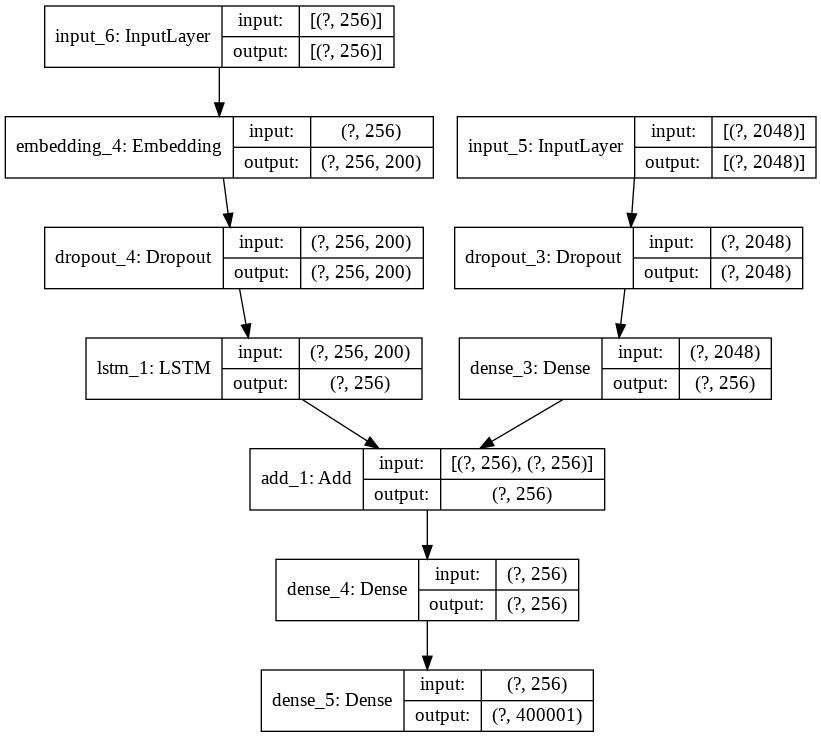

In [47]:
tf.keras.utils.plot_model(model_RNN_decoder, to_file=OPDIR+'RNN_decoder_model_plot_Link1Mix_approach_2.jpg', show_shapes=True, show_layer_names=True)

## TRAINING OF MODEL

In [ ]:
filepath = OPDIR + "weights_best.hdf5"
checkpoint = [ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')]

In [ ]:
for i in range(epochs):
    generator = data_generator(train_captions, train_, word_to_index, max_length_caption, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1,callbacks=checkpoint)

###  KEEP FOR REFERENCE - DO NOT DELETE
###  Based on the code of Link: https://iq.opengenus.org/image-captioning-using-keras/   which did not make complete sense
###  Model.summary() information as table and picture
### 
#### The original code on the link - kept only as reference - has syntax errors due to the way he imported his packages
#### 
#### 
#####inputs1 = Input(shape=(2048,))
#####fe1 = Dropout(0.5)(inputs1)
#####fe2 = Dense(256, activation='relu')(fe1)
#####inputs2 = Input(shape=(max_length_caption,))
#####se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
#####se2 = Dropout(0.5)(se1)
#####se3 = LSTM(256)(se2)
#####decoder1 = add([fe2, se3])
#####decoder2 = Dense(256, activation='relu')(decoder1)
#####outputs = Dense(vocab_size, activation='softmax')(decoder2)
#####model = Model(inputs=[inputs1, inputs2], outputs=outputs)
####
####
#### I made it this way:
#### parameters to define model
#### EMBEDDING_DIMS = 200
#### VOCAB_SIZE = 400001
#### MAX_LENGTH_CAPTION = 256
#### inputs1 = keras.Input(shape=(2048,))
#### fe1 = layers.Dropout(0.5)(inputs1)
#### fe2 = layers.Dense(256, activation='relu')(fe1)
#### inputs2 = keras.Input(shape=(MAX_LENGTH_CAPTION,))
#### se1 = layers.Embedding(VOCAB_SIZE, EMBEDDING_DIMS, mask_zero=True)(inputs2)
#### se2 = layers.Dropout(0.5)(se1)
#### se3 = layers.LSTM(256)(se2)
#### decoder1 = layers.add([fe2, se3])
#### decoder2 = layers.Dense(256, activation='relu')(decoder1)
#### outputs = layers.Dense(VOCAB_SIZE, activation='softmax')(decoder2)
#### model_RNN_decoder = keras.Model(inputs=[inputs1, inputs2], outputs=outputs)
####
####
#### The model summary output this:
####
#### Model: "functional_5"
#### __________________________________________________________________________________________________
#### Layer (type)                    Output Shape         Param #     Connected to                     
#### ==================================================================================================
#### input_13 (InputLayer)           [(None, 256)]        0                                            
#### __________________________________________________________________________________________________
#### input_12 (InputLayer)           [(None, 2048)]       0                                            
#### __________________________________________________________________________________________________
#### embedding_6 (Embedding)         (None, 256, 200)     80000200    input_13[0][0]                   
#### __________________________________________________________________________________________________
#### dropout_9 (Dropout)             (None, 2048)         0           input_12[0][0]                   
#### __________________________________________________________________________________________________
#### dropout_10 (Dropout)            (None, 256, 200)     0           embedding_6[0][0]                
#### __________________________________________________________________________________________________
#### dense_11 (Dense)                (None, 256)          524544      dropout_9[0][0]                  
#### __________________________________________________________________________________________________
#### lstm_3 (LSTM)                   (None, 256)          467968      dropout_10[0][0]                 
#### __________________________________________________________________________________________________
#### add_3 (Add)                     (None, 256)          0           dense_11[0][0]                   
####                                                                  lstm_3[0][0]                     
#### __________________________________________________________________________________________________
#### dense_12 (Dense)                (None, 256)          65792       add_3[0][0]                      
#### __________________________________________________________________________________________________
#### dense_13 (Dense)                (None, 400001)       102800257   dense_12[0][0]                   
#### ==================================================================================================
#### Total params: 183,858,761
#### Trainable params: 183,858,761
#### Non-trainable params: 0

In [ ]:
## parameters to define model
EMBEDDING_DIMS = 200
VOCAB_SIZE = 400001
MAX_LENGTH_CAPTION = 256

inputs1 = keras.Input(shape=(2048,))
fe1 = layers.Dropout(0.5)(inputs1)
fe2 = layers.Dense(256, activation='relu')(fe1)
inputs2 = keras.Input(shape=(MAX_LENGTH_CAPTION,))
se1 = layers.Embedding(VOCAB_SIZE, EMBEDDING_DIMS, mask_zero=True)(inputs2)
se2 = layers.Dropout(0.5)(se1)
se3 = layers.LSTM(256)(se2)
decoder1 = layers.add([fe2, se3])
decoder2 = layers.Dense(256, activation='relu')(decoder1)
outputs = layers.Dense(VOCAB_SIZE, activation='softmax')(decoder2)
model_RNN_decoder = keras.Model(inputs=[inputs1, inputs2], outputs=outputs)

In [60]:
##  KEEP FOR REFERENCE - DO NOT DELETE
# model_RNN_decoder.summary()   - output below based on the code of Link: https://iq.opengenus.org/image-captioning-using-keras/   which did not make complete sense

#Model: "functional_5"
#__________________________________________________________________________________________________
#Layer (type)                    Output Shape         Param #     Connected to                     
#==================================================================================================
#input_13 (InputLayer)           [(None, 256)]        0                                            
#__________________________________________________________________________________________________
#input_12 (InputLayer)           [(None, 2048)]       0                                            
#__________________________________________________________________________________________________
#embedding_6 (Embedding)         (None, 256, 200)     80000200    input_13[0][0]                   
#__________________________________________________________________________________________________
#dropout_9 (Dropout)             (None, 2048)         0           input_12[0][0]                   
#__________________________________________________________________________________________________
#dropout_10 (Dropout)            (None, 256, 200)     0           embedding_6[0][0]                
#__________________________________________________________________________________________________
#dense_11 (Dense)                (None, 256)          524544      dropout_9[0][0]                  
#__________________________________________________________________________________________________
#lstm_3 (LSTM)                   (None, 256)          467968      dropout_10[0][0]                 
#__________________________________________________________________________________________________
#add_3 (Add)                     (None, 256)          0           dense_11[0][0]                   
#                                                                 lstm_3[0][0]                     
#__________________________________________________________________________________________________
#dense_12 (Dense)                (None, 256)          65792       add_3[0][0]                      
#__________________________________________________________________________________________________
#dense_13 (Dense)                (None, 400001)       102800257   dense_12[0][0]                   
#==================================================================================================
#Total params: 183,858,761
#Trainable params: 183,858,761
#Non-trainable params: 0

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 256, 200)     80000200    input_13[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 2048)         0           input_12[0][0]                   
_______________________________________________________________________________________

In [49]:
OPDIR

'/content/gdrive/My Drive/ThesisStoryGen/Data/ImgCapTraining/CocoVal2017_1/'

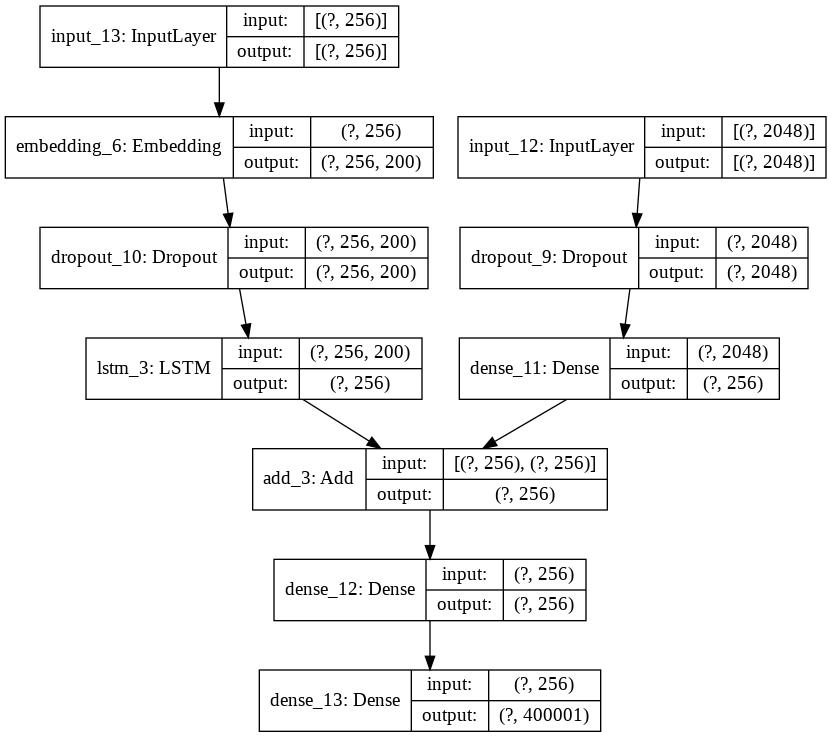

In [59]:
#tf.keras.utils.plot_model(model_RNN_decoder, to_file=OPDIR+'RNN_decoder_model_plot_OnlyLink1_approach_1.jpg', show_shapes=True, show_layer_names=True)

## NEXT SECTION